# MRI Histogram Visualization - Step by Step Examples

This notebook demonstrates all visualization capabilities for MRI scans.

**Environment**: `mri_sr_env`

## Setup: Import Required Modules

In [19]:
import sys
from pathlib import Path

# Add parent directory to path
sys.path.insert(0, str(Path.cwd().parent))

from src.visualization import show_mri_histogram, compare_mri_histograms

# For inline display in Jupyter
import matplotlib
%matplotlib inline

print("✓ Imports successful!")

✓ Imports successful!


---
## Step 1: Basic Histogram - Raw MRI Scan

Display the intensity distribution of a raw MRI scan.

In [20]:
subject = "100206_3T_T2w_SPC1"

Step 1: Raw MRI Scan Histogram
Loading MRI scan: 100206_3T_T2w_SPC1.nii.gz


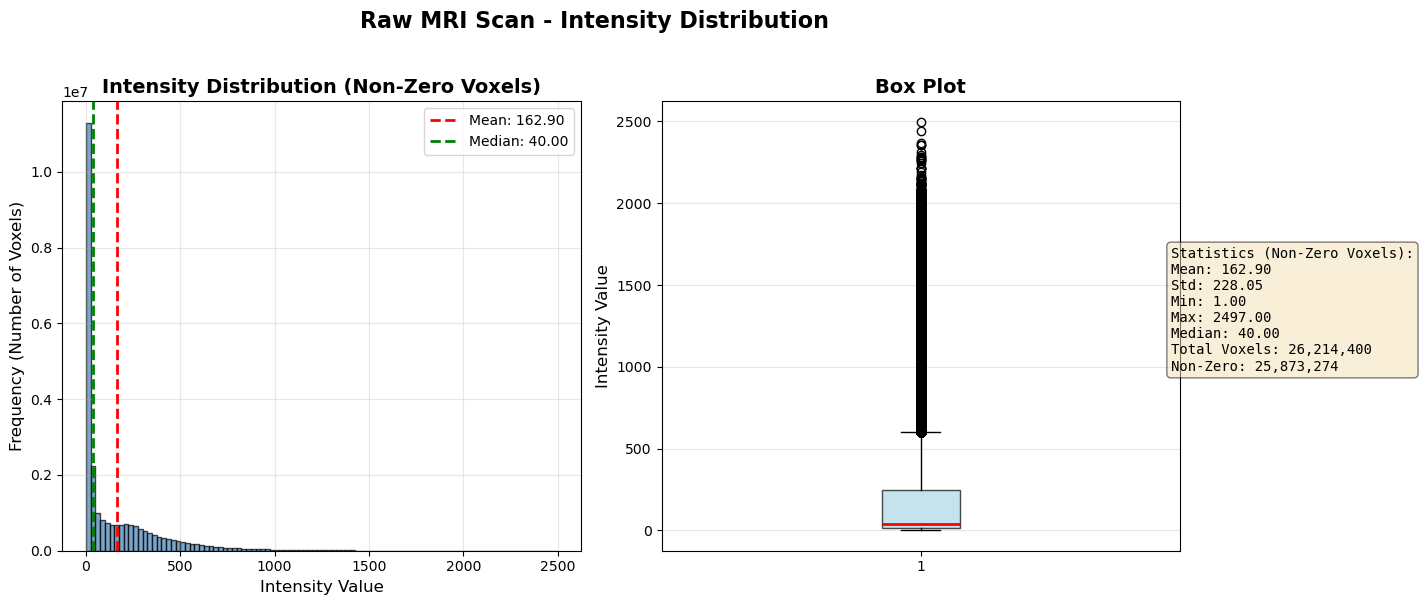


MRI INTENSITY STATISTICS (Non-Zero Voxels)
Mean:          162.8996
Std Dev:       228.0487
Minimum:       1.0000
Maximum:       2497.0000
Median:        40.0000
Total Voxels:  26,214,400
Non-Zero:      25,873,274
Percentage:    98.70%


Key Statistics:
  Mean:   162.90
  Median: 40.00
  Std:    228.05
  Range:  [1.00, 2497.00]


In [21]:
# Load and display raw MRI scan
raw_file = Path('../data/raw/' + subject + '.nii.gz')

print("Step 1: Raw MRI Scan Histogram")
print("="*50)

stats_raw = show_mri_histogram(
    input_file=raw_file,
    bins=100,
    title="Raw MRI Scan - Intensity Distribution"
)

# Access and display key statistics
print(f"\nKey Statistics:")
print(f"  Mean:   {stats_raw['mean']:.2f}")
print(f"  Median: {stats_raw['median']:.2f}")
print(f"  Std:    {stats_raw['std']:.2f}")
print(f"  Range:  [{stats_raw['min']:.2f}, {stats_raw['max']:.2f}]")

---
## Step 2: High-Resolution Processed Scan

Visualize the intensity distribution after full preprocessing.

Step 2: Processed High-Resolution Scan
Loading MRI scan: 100206_3T_T2w_SPC1.nii.gz


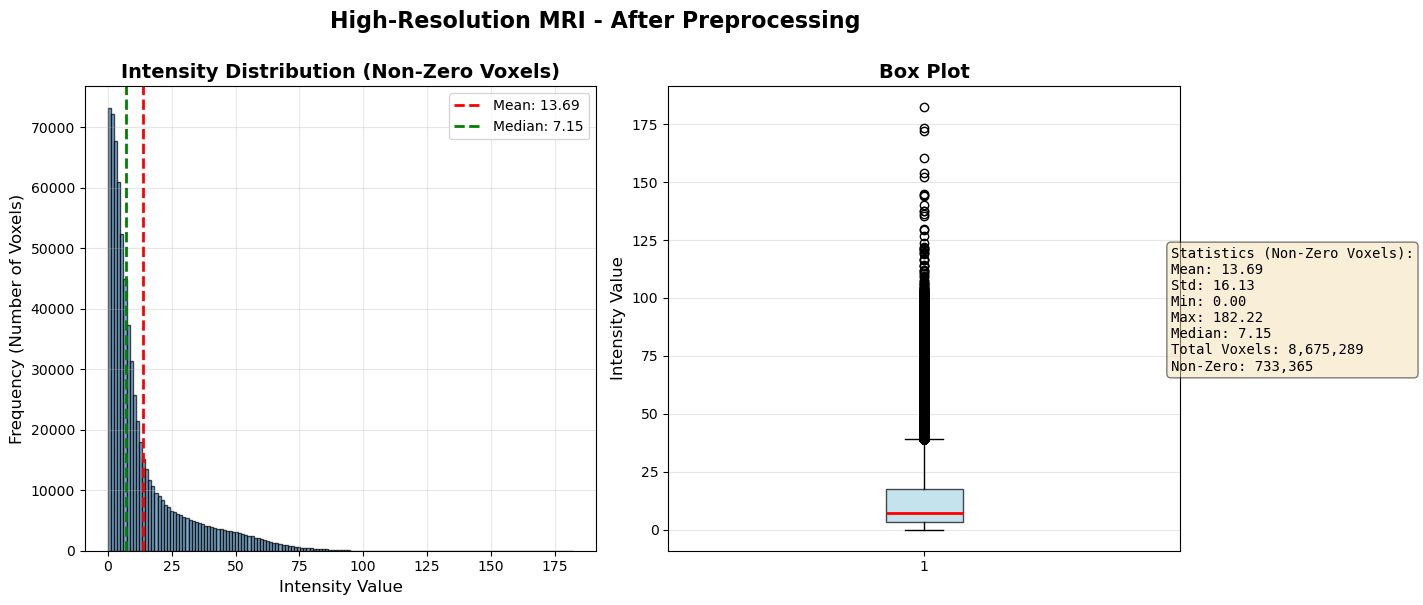


MRI INTENSITY STATISTICS (Non-Zero Voxels)
Mean:          13.6866
Std Dev:       16.1340
Minimum:       0.0000
Maximum:       182.2233
Median:        7.1497
Total Voxels:  8,675,289
Non-Zero:      733,365
Percentage:    8.45%


Processed Scan Statistics:
  Mean:   13.69
  Median: 7.15
  Non-zero voxels: 733,365


In [22]:
# Load processed high-resolution scan
hr_file = Path('../data/processed/HR/' + subject + '.nii.gz')

print("Step 2: Processed High-Resolution Scan")
print("="*50)

stats_hr = show_mri_histogram(
    input_file=hr_file,
    bins=150,
    title="High-Resolution MRI - After Preprocessing"
)

print(f"\nProcessed Scan Statistics:")
print(f"  Mean:   {stats_hr['mean']:.2f}")
print(f"  Median: {stats_hr['median']:.2f}")
print(f"  Non-zero voxels: {stats_hr['non_zero_voxels']:,}")

---
## Step 3: Compare HR vs LR (Thick Slice)

Compare high-resolution with low-resolution (3mm thick slice) scan.

Step 3: HR vs LR Comparison (3mm Thick Slice)


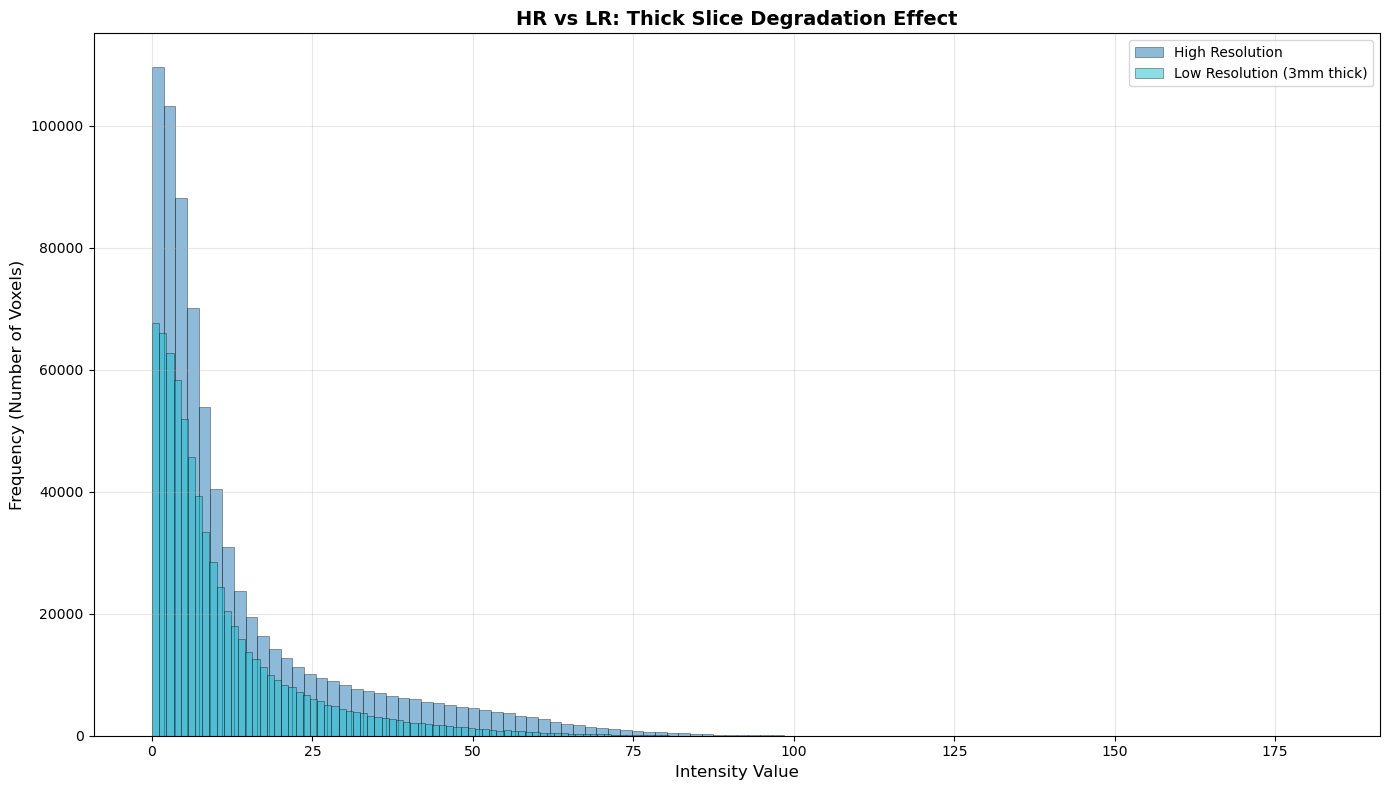


Comparison Results:

High Resolution:
  Mean:   13.69
  Std:    16.13
  Median: 7.15

Low Resolution (3mm thick):
  Mean:   10.86
  Std:    11.95
  Median: 6.66


In [23]:
# Compare HR vs LR
lr_thick3 = Path('../data/processed/LR/' + subject + '_thick_3mm.nii.gz')

print("Step 3: HR vs LR Comparison (3mm Thick Slice)")
print("="*50)

comparison_stats = compare_mri_histograms(
    file_list=[hr_file, lr_thick3],
    labels=["High Resolution", "Low Resolution (3mm thick)"],
    bins=100,
    title="HR vs LR: Thick Slice Degradation Effect"
)

print("\nComparison Results:")
for label, stats in comparison_stats.items():
    print(f"\n{label}:")
    print(f"  Mean:   {stats['mean']:.2f}")
    print(f"  Std:    {stats['std']:.2f}")
    print(f"  Median: {stats['median']:.2f}")

---
## Step 4: Multiple Degradation Types Comparison

Compare different degradation methods (thick slice vs in-plane downsampling).

Step 4: Multiple Degradation Types


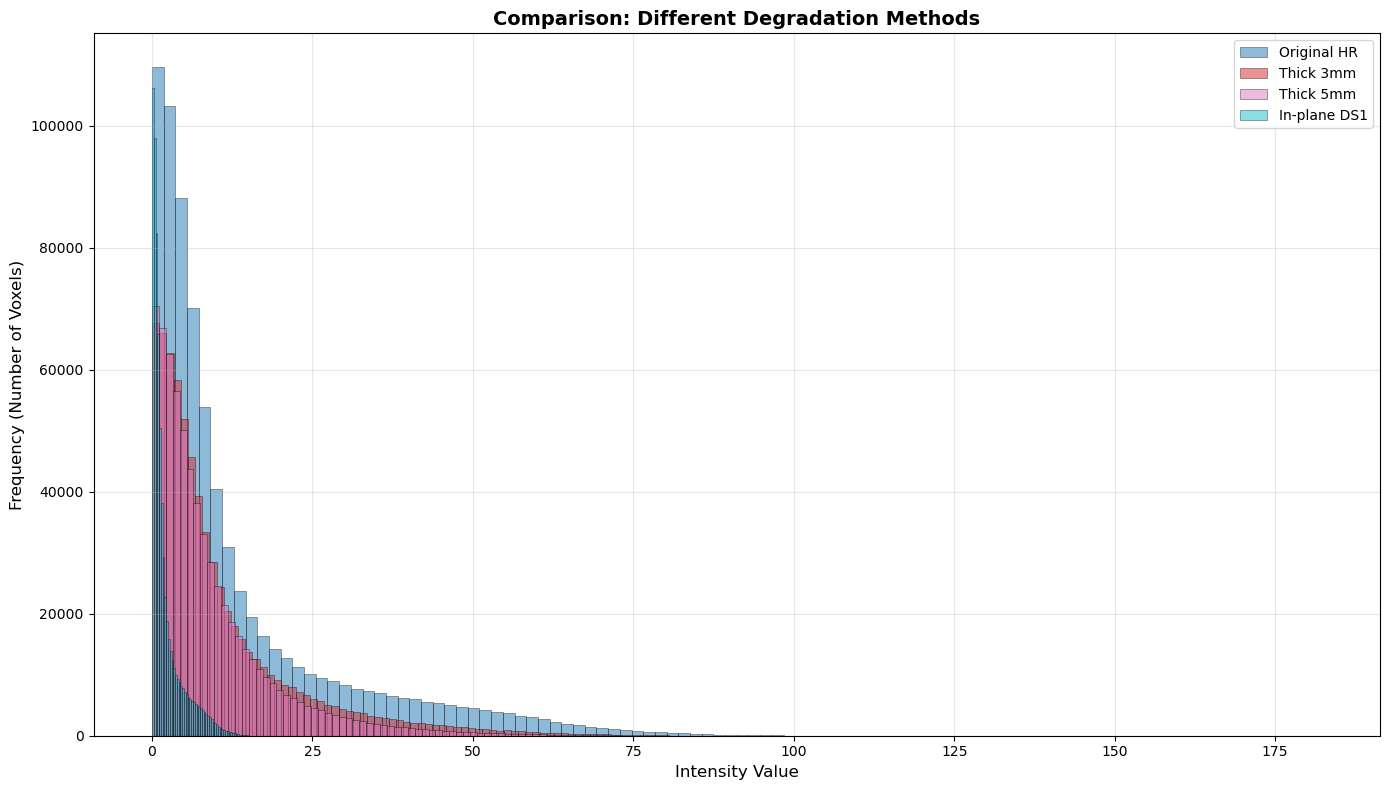


Degradation Effects Summary:
Original HR          - Mean:   13.69, Std:   16.13
Thick 3mm            - Mean:   10.86, Std:   11.95
Thick 5mm            - Mean:    9.21, Std:    9.82
In-plane DS1         - Mean:    2.13, Std:    2.50


In [24]:
# Compare multiple degradation types
lr_thick5 = Path('../data/processed/LR/' + subject + '_thick_5mm.nii.gz')
lr_inplane1 = Path('../data/processed/LR/100206_3T_T2w_SPC1_inplane_ds1.nii.gz')
lr_inplane2 = Path('../data/processed/LR/100206_3T_T2w_SPC1_inplane_ds2.nii.gz')

print("Step 4: Multiple Degradation Types")
print("="*50)

degradation_files = [hr_file, lr_thick3, lr_thick5, lr_inplane1]
degradation_labels = [
    "Original HR",
    "Thick 3mm",
    "Thick 5mm",
    "In-plane DS1"
]

deg_stats = compare_mri_histograms(
    file_list=degradation_files,
    labels=degradation_labels,
    bins=100,
    title="Comparison: Different Degradation Methods"
)

print("\nDegradation Effects Summary:")
for label, stats in deg_stats.items():
    print(f"{label:20s} - Mean: {stats['mean']:7.2f}, Std: {stats['std']:7.2f}")

---
## Step 5: Processing Pipeline Stages

Track intensity changes across different preprocessing stages.

Step 5: Processing Pipeline Stages


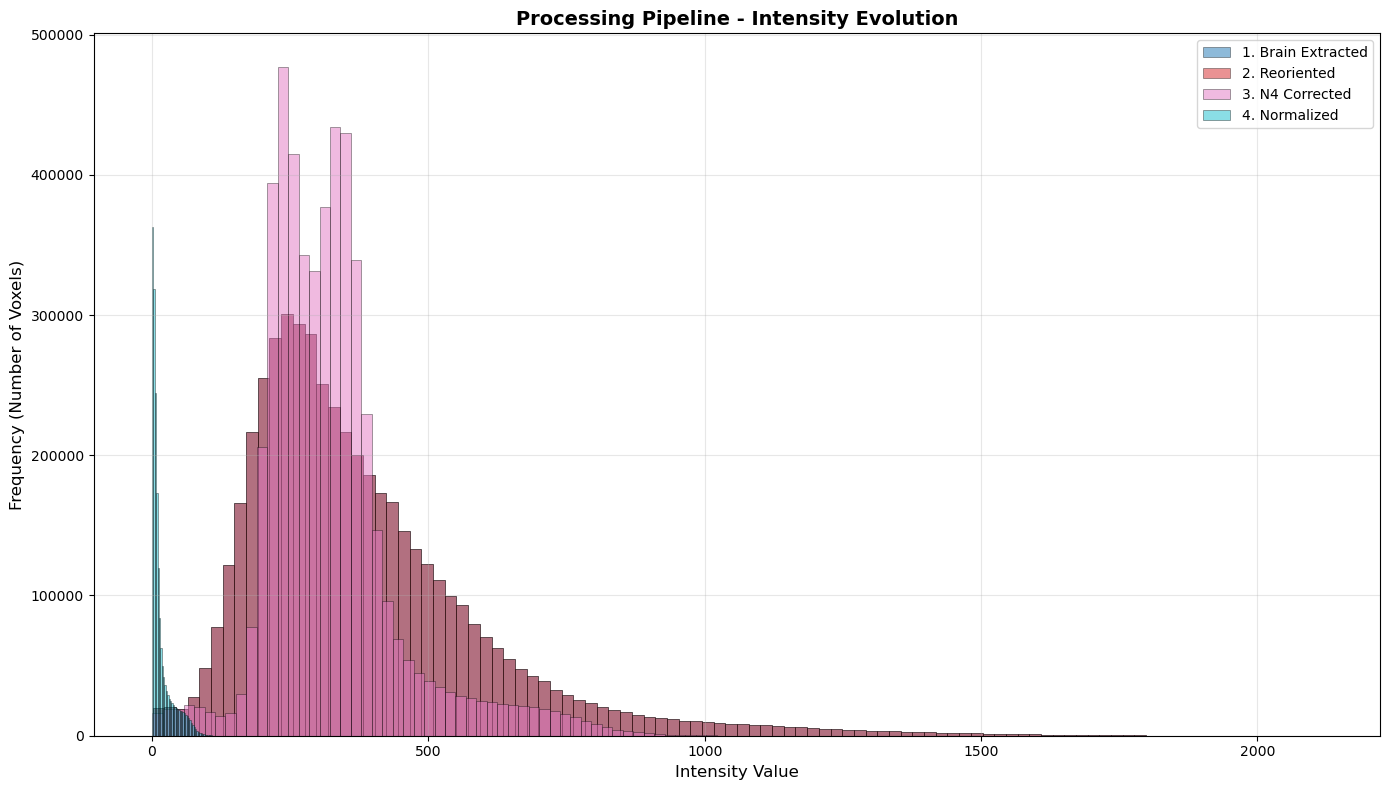


Pipeline Stage Statistics:

1. Brain Extracted:
  Mean: 383.73

2. Reoriented:
  Mean: 383.73

3. N4 Corrected:
  Mean: 322.72

4. Normalized:
  Mean: 15.87


In [35]:
# Compare processing pipeline stages
intermediate_dir = Path(f'../data/processed/intermediate/{subject}')

print("Step 5: Processing Pipeline Stages")
print("="*50)

pipeline_files = [
    intermediate_dir / f"{subject}_00_brain_extracted.nii.gz",
    intermediate_dir / f"{subject}_01_raw_reoriented.nii.gz",
    intermediate_dir / f"{subject}_03_hr_n4.nii.gz",
    intermediate_dir / f"{subject}_04_hr_norm.nii.gz"
]

pipeline_labels = [
    "1. Brain Extracted",
    "2. Reoriented",
    "3. N4 Corrected",
    "4. Normalized"
]

# Filter to only existing files
existing_files = [f for f in pipeline_files if f.exists()]
existing_labels = [pipeline_labels[i] for i, f in enumerate(pipeline_files) if f.exists()]

if len(existing_files) > 1:
    pipeline_stats = compare_mri_histograms(
        file_list=existing_files,
        labels=existing_labels,
        bins=100,
        title="Processing Pipeline - Intensity Evolution"
    )
    
    print("\nPipeline Stage Statistics:")
    for label, stats in pipeline_stats.items():
        print(f"\n{label}:")
        print(f"  Mean: {stats['mean']:.2f}")
else:
    print("Not enough intermediate files found.")

---
## Step 6: Gap Degradation Analysis

Analyze the effect of inter-slice gaps on intensity distribution.

Step 6: Inter-Slice Gap Analysis


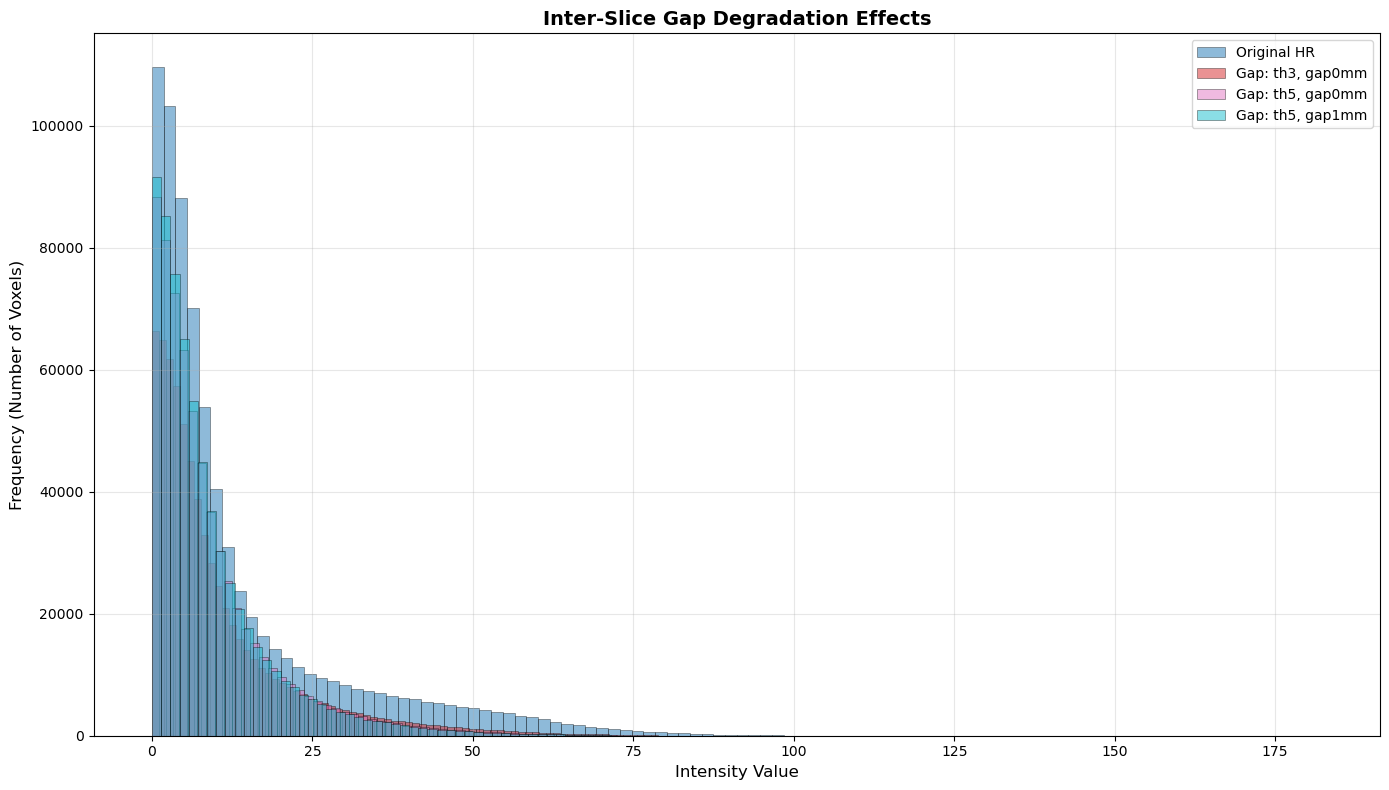


Gap Degradation Results:
Original HR               - Mean:   13.69
Gap: th3, gap0mm          - Mean:   10.80
Gap: th5, gap0mm          - Mean:    9.36
Gap: th5, gap1mm          - Mean:    9.03


In [26]:
# Compare gap degradations

lr_gap_th3 = Path(f'../data/processed/LR/{subject}_gap_th3_gap0mm.nii.gz')
lr_gap_th5_0mm = Path(f'../data/processed/LR/{subject}_gap_th5_gap0mm.nii.gz')
lr_gap_th5_1mm = Path(f'../data/processed/LR/{subject}_gap_th5_gap1mm.nii.gz')

print("Step 6: Inter-Slice Gap Analysis")
print("="*50)

gap_files = [hr_file, lr_gap_th3, lr_gap_th5_0mm, lr_gap_th5_1mm]
gap_labels = [
    "Original HR",
    "Gap: th3, gap0mm",
    "Gap: th5, gap0mm",
    "Gap: th5, gap1mm"
]

# Filter existing files
existing_gap_files = [f for f in gap_files if f.exists()]
existing_gap_labels = [gap_labels[i] for i, f in enumerate(gap_files) if f.exists()]

if len(existing_gap_files) > 1:
    gap_stats = compare_mri_histograms(
        file_list=existing_gap_files,
        labels=existing_gap_labels,
        bins=100,
        title="Inter-Slice Gap Degradation Effects"
    )
    
    print("\nGap Degradation Results:")
    for label, stats in gap_stats.items():
        print(f"{label:25s} - Mean: {stats['mean']:7.2f}")
else:
    print("Not enough gap degradation files found.")

---
## Step 7: Save Visualizations to Files

Export histograms as high-resolution PNG images.

Step 7: Saving Visualizations

1. Saving HR histogram...
Loading MRI scan: 100206_3T_T2w_SPC1.nii.gz
Histogram saved to: ..\results\notebook_visualizations\hr_scan100206_3T_T2w_SPC1.png


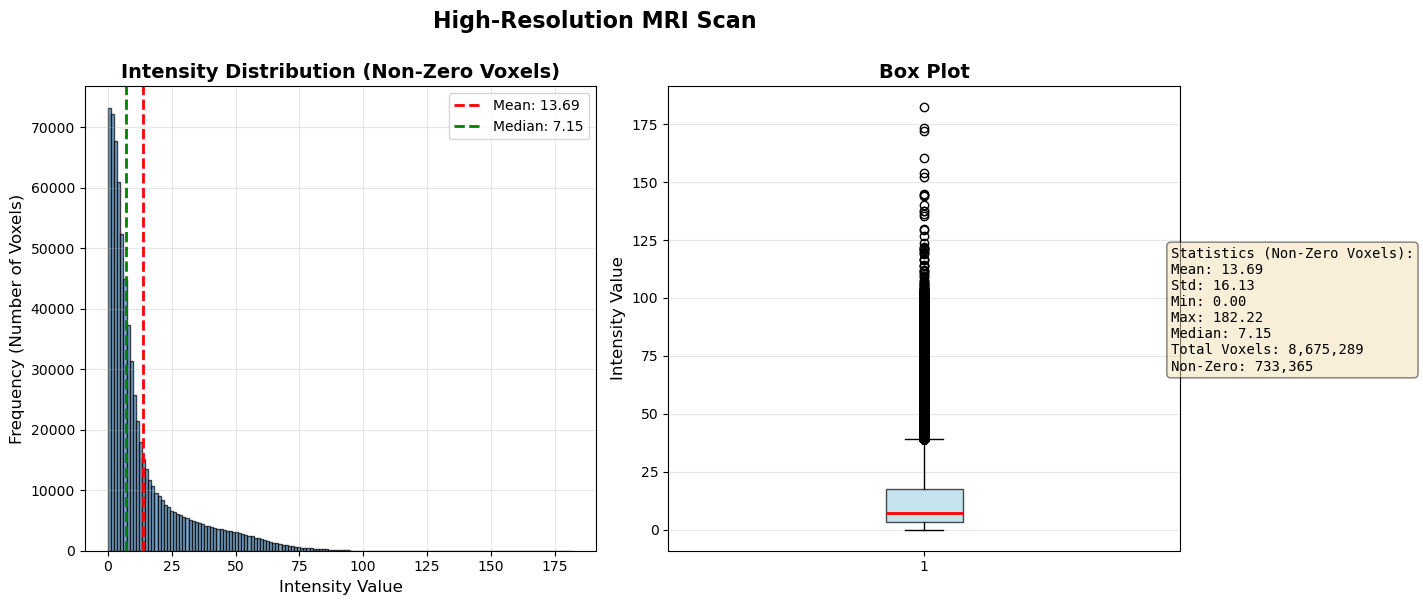


MRI INTENSITY STATISTICS (Non-Zero Voxels)
Mean:          13.6866
Std Dev:       16.1340
Minimum:       0.0000
Maximum:       182.2233
Median:        7.1497
Total Voxels:  8,675,289
Non-Zero:      733,365
Percentage:    8.45%


2. Saving degradation comparison...
Comparison histogram saved to: ..\results\notebook_visualizations\degradation_comparison100206_3T_T2w_SPC1.png


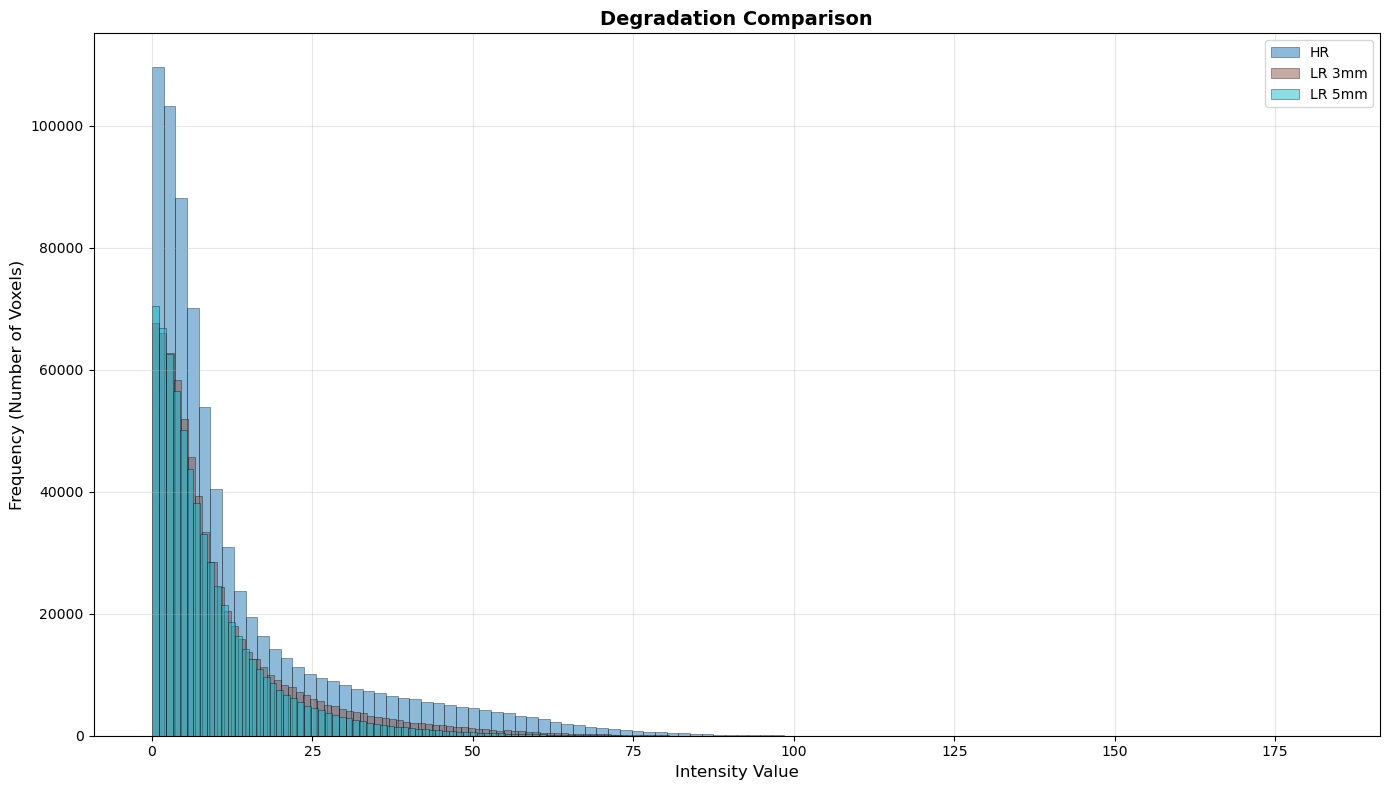


[SUCCESS] Visualizations saved to: ..\results\notebook_visualizations
  - hr_scan.png
  - degradation_comparison.png


In [ ]:
# Create output directory
output_dir = Path('../results/notebook_visualizations')
output_dir.mkdir(parents=True, exist_ok=True)

print("Step 7: Saving Visualizations")
print("="*50)

# Save HR histogram
print("\n1. Saving HR histogram...")
show_mri_histogram(
    input_file=hr_file,
    bins=150,
    title="High-Resolution MRI Scan",
    save_path=output_dir / f'hr_scan_{subject}.png'
)

# Save degradation comparison
print("\n2. Saving degradation comparison...")
compare_mri_histograms(
    file_list=[hr_file, lr_thick3, lr_thick5],
    labels=["HR", "LR 3mm", "LR 5mm"],
    title="Degradation Comparison",
    save_path=output_dir / f'degradation_comparison_{subject}.png'
)

print(f"\n[SUCCESS] Visualizations saved to: {output_dir}")
print(f"  - hr_scan.png")
print(f"  - degradation_comparison.png")

---
## Summary

This notebook demonstrated:

1. ✓ Basic histogram visualization for single MRI scans
2. ✓ Comparison of HR vs LR scans
3. ✓ Analysis of different degradation types
4. ✓ Tracking intensity changes across processing stages
5. ✓ Inter-slice gap degradation effects
6. ✓ Exporting visualizations to files

### Key Functions Used:

- `show_mri_histogram()` - Single scan analysis with detailed statistics
- `compare_mri_histograms()` - Multi-scan overlay comparison

### Output Statistics:

Each function returns a dictionary with:
- `mean`, `std`, `min`, `max`, `median`
- `total_voxels`, `non_zero_voxels`
- `data` - raw intensity array (for further analysis)

---
*Environment: mri_sr_env*

In [28]:
print("All visualizations completed successfully! ✓")

All visualizations completed successfully! ✓
